## 210628 한경아카데미 서현진

# sonar 연습문제 

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [53]:
seed = 2021 # 할때마다 동일한 결과를 내기 위해 seed 값 지정함
np.random.seed(seed)
tf.random.set_seed(seed)

## 1. 데이터 셋 만들기

In [54]:
df = pd.read_csv('dataset/sonar.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### - 전처리

In [55]:
# 레이블 인코딩 
from sklearn.preprocessing import LabelEncoder

In [56]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [57]:
# df[60]이 R과 M으로 존재
df[60] = LabelEncoder().fit_transform(df[60])
df.head() # 0과 1로 바꿈

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


## 2. 모델 정의/ 설정/ 학습 / 평가


 ### - train/test set 분리

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(  
    df.iloc[:,:-1].values, df.iloc[:,-1].values,
    stratify=df.iloc[:,-1].values, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156, 60), (52, 60), (156,), (52,))

### - 모델 정의

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
# model1
model1_1 = Sequential()
model1_1.add(Dense(12,input_shape=(60, ), activation ='relu' ) ) # Hidden Layer 1 
model1_1.add(Dense(8, activation ='relu' ) )  # Hidden Layer 2
model1_1.add(Dense(1, activation= 'sigmoid') ) # Output layer
model1_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 12)                732       
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 9         
Total params: 845
Trainable params: 845
Non-trainable params: 0
_________________________________________________________________


In [61]:
# 모델설정  # optimizer = 'adam'
model1_1.compile(
loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy']
)
# 모델 학습
history1_1_1 = model1_1.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 300, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=50, #한번에 처리할 수 있는 양을 지정
    verbose= 0
    )

# 정확도 평가
print(f'model1_1_1 정확도: {model1_1.evaluate(X_test, y_test)[1]:4f}')


2/2 [==============================] - 0s 990us/step - loss: 0.5564 - accuracy: 0.8077
model1_1_1 정확도: 0.807692


In [62]:
# 모델설정  # optimizer = 'adam'
model1_1.compile(
loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy']
)
# 모델 학습
history1_1_2 = model1_1.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 300, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=50, #한번에 처리할 수 있는 양을 지정
    verbose= 0
    )

# 정확도 평가
print(f'model1_1_2 정확도: {model1_1.evaluate(X_test, y_test)[1]:4f}')

2/2 [==============================] - 0s 998us/step - loss: 0.8085 - accuracy: 0.8462
model1_1_2 정확도: 0.846154


In [63]:
# 모델설정 # optimizer = 'rmsprop'
model1_1.compile(
loss = 'binary_crossentropy', 
optimizer = 'rmsprop',
metrics = ['accuracy']
)
# 모델 학습
history1_1_3 = model1_1.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 300, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=50, #한번에 처리할 수 있는 양을 지정
    verbose= 0
    )

# 정확도 평가
print(f'model1_1_3 정확도: {model1_1.evaluate(X_test, y_test)[1]:4f}')

2/2 [==============================] - 0s 1ms/step - loss: 1.4705 - accuracy: 0.8654
model1_1_3 정확도: 0.865385


In [64]:
# 모델설정 # optimizer = 'rmsprop'
model1_1.compile(
loss = 'binary_crossentropy', 
optimizer = 'rmsprop',
metrics = ['accuracy']
)
# 모델 학습
history1_1_4 = model1_1.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 300, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=50, #한번에 처리할 수 있는 양을 지정
    verbose= 0
    )

# 정확도 평가
print(f'model1_1_4 정확도: {model1_1.evaluate(X_test, y_test)[1]:4f}')

2/2 [==============================] - 0s 501us/step - loss: 1.9639 - accuracy: 0.8462
model1_1_4 정확도: 0.846154


### 다른 model 

In [75]:
# model2
model2_1 = Sequential()
model2_1.add(Dense(24, input_dim=60, activation='relu'))
model2_1.add(Dense(8, activation='relu'))
model2_1.add(Dense(1, activation='sigmoid'))
model2_1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 24)                1464      
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 200       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
Total params: 1,673
Trainable params: 1,673
Non-trainable params: 0
_________________________________________________________________


In [76]:
# 모델설정  # optimizer = 'adam'
model2_1.compile(
loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy']
)
# 모델 학습
history2_1_1 = model2_1.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 300, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=50, #한번에 처리할 수 있는 양을 지정
    verbose= 0
    )

# 정확도 평가
print(f'model2_1_1 정확도: {model2_1.evaluate(X_test, y_test)[1]:4f}')

2/2 [==============================] - 0s 996us/step - loss: 0.5328 - accuracy: 0.8462
model2_1_1 정확도: 0.846154


In [77]:
# 모델설정  # optimizer = 'adam'
model2_1.compile(
loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy']
)
# 모델 학습
history2_1_2 = model2_1.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 300, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=50, #한번에 처리할 수 있는 양을 지정
    verbose= 0
    )

# 정확도 평가
print(f'model2_1_2 정확도: {model2_1.evaluate(X_test, y_test)[1]:4f}')

2/2 [==============================] - 0s 999us/step - loss: 0.9035 - accuracy: 0.7692
model2_1_2 정확도: 0.769231


In [78]:
# 모델설정 # optimizer = 'rmsprop'
model2_1.compile(
loss = 'binary_crossentropy', 
optimizer = 'rmsprop',
metrics = ['accuracy']
)
# 모델 학습
history2_1_3 = model2_1.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 300, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=50, #한번에 처리할 수 있는 양을 지정
    verbose= 0
    )

# 정확도 평가
print(f'model2_1_3 정확도: {model2_1.evaluate(X_test, y_test)[1]:4f}')

2/2 [==============================] - 0s 998us/step - loss: 1.3321 - accuracy: 0.7885
model2_1_3 정확도: 0.788462


In [79]:
# 모델설정 # optimizer = 'rmsprop'
model2_1.compile(
loss = 'binary_crossentropy', 
optimizer = 'rmsprop',
metrics = ['accuracy']
)
# 모델 학습
history2_1_4 = model2_1.fit(
    X_train, y_train, 
    validation_split= 0.2, #테스트해보는 셋 지정
    epochs= 300, #epochs가 너무 크면 과대적합의 위험이 있다.
    batch_size=50, #한번에 처리할 수 있는 양을 지정
    verbose= 0
    )

# 정확도 평가
print(f'model2_1_4 정확도: {model2_1.evaluate(X_test, y_test)[1]:4f}')

2/2 [==============================] - 0s 997us/step - loss: 1.6977 - accuracy: 0.8077
model2_1_4 정확도: 0.807692


### 또 다른 모델

In [66]:
# model3
model3 = Sequential()
model3.add(Dense(30, input_dim=60, activation='relu'))
model3.add(Dense(15, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_43 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 16        
Total params: 2,311
Trainable params: 2,311
Non-trainable params: 0
_________________________________________________________________


### - 모델 학습

수렴이 빠르게 되고, 학습용 데이터셋에 대한 성능이 높거나, 로스가 낮은 경우 학습 또는 최적화가 비교적 용이하다. 
### * batch_size 
- 배치 사이즈가 큰 경우, 기울기를 계산하기 위해 더 많은 데이터를 사용하게 되므로 우리가 최적화 시켜야하는 전체 학습용 데이터를 사용한 해공간의 기울기 값과 유사한 기울기를 사용하므로 최적화가 더 수월해질 수 있다.하지만 실제 최적화 시켜야할 문제공간이 평평한 경우에는 실제와 유사하게 근사된 기울기의 절대값이 작아 수렴 속도가 매우 느려질 수 있고, 극단적인 경우에는 극소점(local minima) 혹은 안장점(saddle point)에 빠져서 로스가 줄어들지 않을 수도 있다.
- 배치 사이즈가 작은 경우, 상대적으로 부정확한 기울기를 사용한다는 단점이 있지만, 한번의 업데이트에 적은 계산 비용이 들어가 한번 업데이트 할 동안 여러번의 업데이트를 수행할 수 있고, 기울기의 부정확한 면이 랜덤성으로 작용해 실제 기울기가 낮은 구간이나 극소점, 안장점에서 쉽게 벗어날 가능성이 있다는 장점이 있다. ( 필요한 메모리 감소)

즉, 가용 메모리가 적을 때는 batch size를 상대적으로 작게, 보다 안정적으로 학습을 시키고 싶다면 batch size를 상대적으로 높게 설정한다 .단, batch size가 커질 수록 일반화 성능은 감소하는 경우가 존재하므로 이를 유의해서 설정한다.

### * verbose
연결 프로세스에 대 한 세부 정보를 표시




##  시각화

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# history1_1_3
y_acc = history1_1_3.history['accuracy']
y_vloss = history1_1_3.history['val_loss']
x_len = np.arange(len(y_acc))

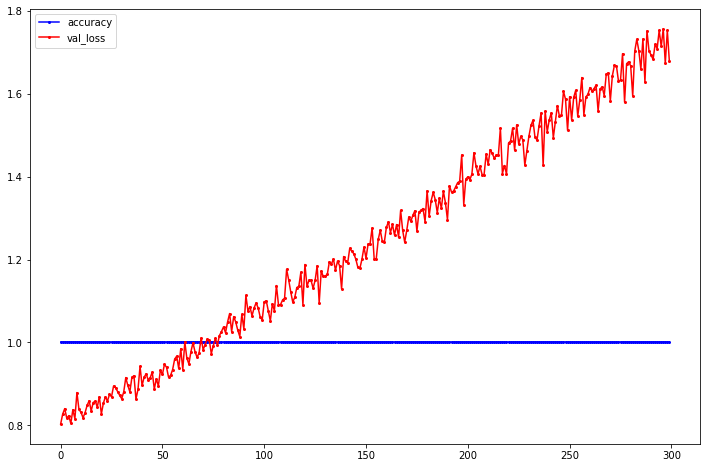

In [73]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()

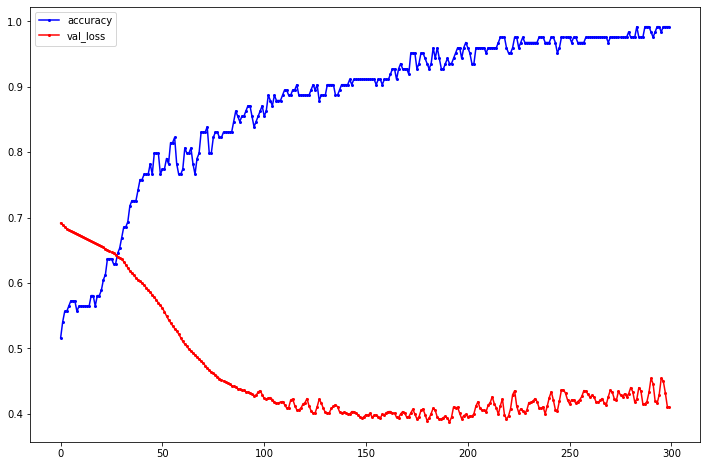

In [80]:
# history2_1_1

y_acc = history2_1_1.history['accuracy']
y_vloss = history2_1_1.history['val_loss']
x_len = np.arange(len(y_acc))

plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()